<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [ ]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [4]:
import pandas as pd

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [2]:
import pandas as pd

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [3]:
import pandas as pd

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv.csv"
df = pd.read_csv("m2_survey_data.csv")

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


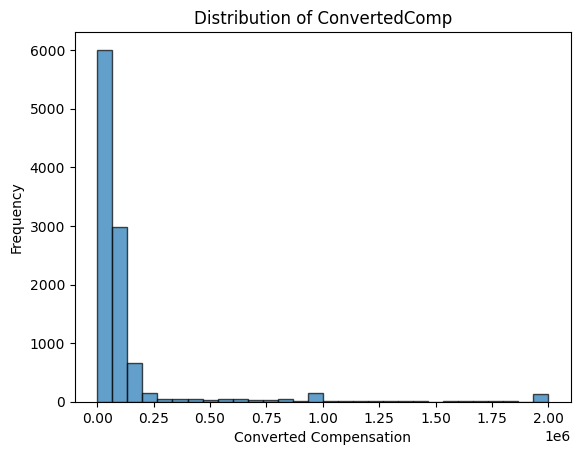

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("m2_survey_data.csv")

# Plot the histogram
plt.hist(df["ConvertedComp"].dropna(), bins=30, edgecolor='k', alpha=0.7)

# Add title and labels
plt.title("Distribution of ConvertedComp")
plt.xlabel("Converted Compensation")
plt.ylabel("Frequency")

# Show the plot
plt.show()

In [7]:
import os
print(os.getcwd())

/drive/DA0321EN/labs/module 3


In [8]:
col_contents=df['ConvertedComp'].head()
print(col_contents)

0     61000.0
1     95179.0
2     90000.0
3    455352.0
4     65277.0
Name: ConvertedComp, dtype: float64


Plot the histogram for the column `ConvertedComp`.


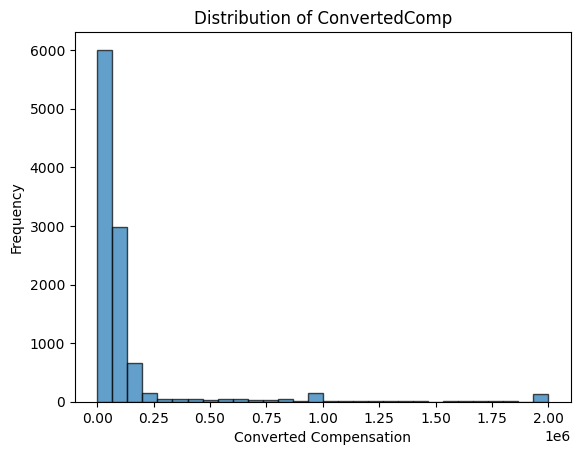

In [6]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("m2_survey_data.csv")

# Plot the histogram
plt.hist(df["ConvertedComp"].dropna(), bins=30, edgecolor='k', alpha=0.7)

# Add title and labels
plt.title("Distribution of ConvertedComp")
plt.xlabel("Converted Compensation")
plt.ylabel("Frequency")

# Show the plot
plt.show()

What is the median of the column `ConvertedComp`?


In [10]:
# your code goes here
median_val=df['ConvertedComp'].median()
print(median_val)

57745.0


How many responders identified themselves only as a **Man**?


In [11]:
# your code goes here
# Filter the DataFrame for responders who identified as "Man"
man_count = df[df['Gender'] == 'Man'].shape[0]

# Print the count
print(man_count)

10480


In [12]:
# Count the number of responders for each gender category
gender_counts = df['Gender'].value_counts()

# Print the count for each category
print(gender_counts)
# Get the count of responders identifying as "Man"
man_count = gender_counts.get('Man', 0)  # Returns 0 if "Man" is not found

# Print the count
print(man_count)

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64
10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [13]:
# your code goes here
# Filter the DataFrame for responders who identified as "Woman"
women_df = df[df['Gender'] == 'Woman']

# Calculate the median of the ConvertedComp column for these responders
median_converted_comp_women = women_df['ConvertedComp'].median()

# Print the median value
print(median_converted_comp_women)

57708.0


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [14]:
#Give the five number summary for the column `Age`?
age_counts=df['Age'].max()
print(age_counts)

99.0


In [14]:
# your code goes here
# Calculate the five-number summary for the Age column
min_age = df['Age'].min()
q1_age = df['Age'].quantile(0.25)
median_age = df['Age'].median()
q3_age = df['Age'].quantile(0.75)
max_age = df['Age'].max()

# Print the five-number summary
print("Five-number summary for Age:")
print(f"Minimum: {min_age}")
print(f"First Quartile (Q1): {q1_age}")
print(f"Median: {median_age}")
print(f"Third Quartile (Q3): {q3_age}")
print(f"Maximum: {max_age}")

Five-number summary for Age:
Minimum: 16.0
First Quartile (Q1): 25.0
Median: 29.0
Third Quartile (Q3): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


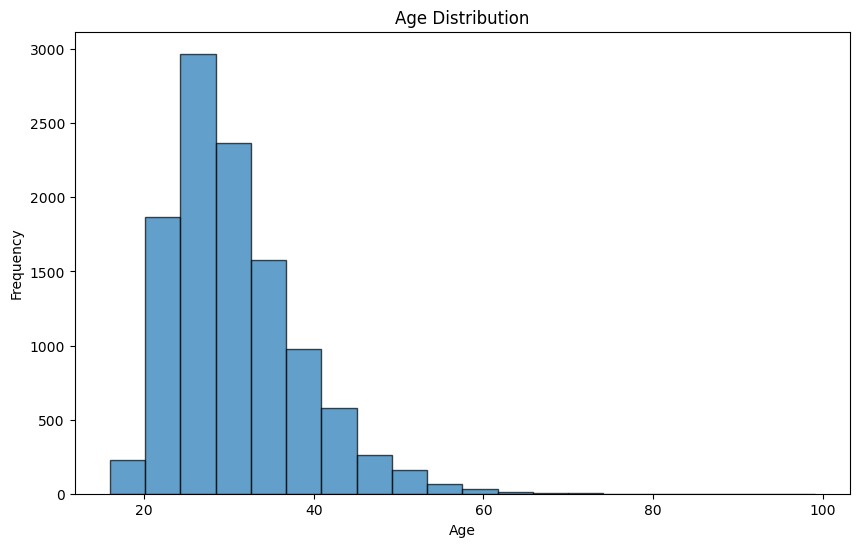

The age group with the highest peak is: 28.0 with a count of 787


In [15]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'Age' column
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()
# Get the frequency of each age
age_counts = df['Age'].value_counts().sort_index()

# Identify the age group with the highest frequency
highest_peak_age = age_counts.idxmax()
highest_peak_count = age_counts.max()

print(f"The age group with the highest peak is: {highest_peak_age} with a count of {highest_peak_count}")

In [16]:
age_count=df['Age']
print(age_count)

0        22.0
1        23.0
2        28.0
3        26.0
4        29.0
         ... 
11393    36.0
11394    25.0
11395    34.0
11396    25.0
11397    30.0
Name: Age, Length: 11398, dtype: float64


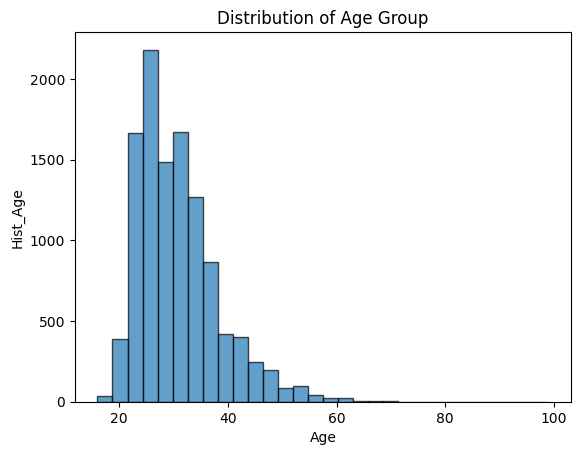

In [17]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv("m2_survey_data.csv")

# Plot the histogram
plt.hist(df["Age"].dropna(), bins=30, edgecolor='k', alpha=0.7)

# Add title and labels
plt.title("Distribution of Age Group")
plt.xlabel("Age")
plt.ylabel("Hist_Age")

# Show the plot
plt.show()

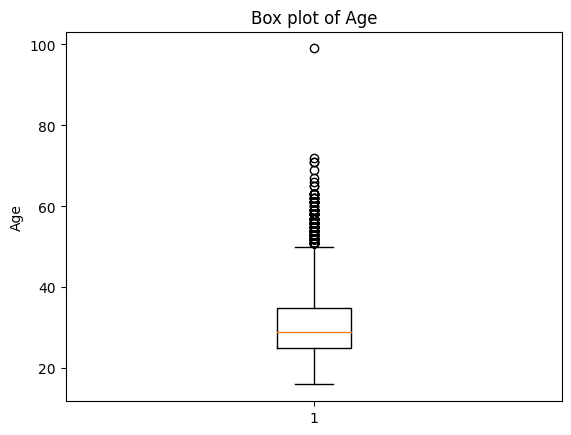

In [18]:
import matplotlib.pyplot as plt

# Box plot to visualize outliers in the Age column
plt.boxplot(df['Age'].dropna())
plt.title('Box plot of Age')
plt.ylabel('Age')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


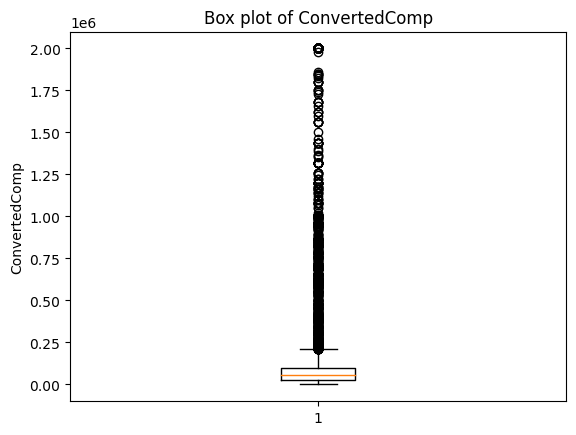

In [19]:
# your code goes here
import matplotlib.pyplot as plt

# Box plot to visualize outliers in the Age column
plt.boxplot(df['ConvertedComp'].dropna())
plt.title('Box plot of ConvertedComp')
plt.ylabel('ConvertedComp')
plt.show()

# Using IQR to identify outliers
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = df[(df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR))]

In [20]:
# Calculate the first quartile (Q1)
Q1 = df['ConvertedComp'].quantile(0.25)

# Calculate the Interquartile Range (IQR)
IQR = df['ConvertedComp'].quantile(0.75) - Q1

# Calculate the lower bound for outliers
lower_bound = Q1 - 1.5 * IQR

# Count the number of outliers below Q1
outliers_below_Q1 = df[df['ConvertedComp'] < lower_bound].shape[0]

# Print the number of outliers below Q1
print("Number of outliers below Q1 in 'ConvertedComp':", outliers_below_Q1)

Number of outliers below Q1 in 'ConvertedComp': 0


Find out the Inter Quartile Range for the column `ConvertedComp`.

In [21]:
# your code goes here
# Calculate the first and third quartiles
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Print the IQR
print("Interquartile Range (IQR) for ConvertedComp:", IQR)

Interquartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [22]:
# Calculate the first and third quartiles
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the lower and upper bounds
print("Lower bound for outliers:", lower_bound)
print("Upper bound for outliers:", upper_bound)

Lower bound for outliers: -82830.0
Upper bound for outliers: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [23]:
# your code goes here
# Calculate the first and third quartiles
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

# Print the number of outliers
print("Number of outliers in ConvertedComp:", num_outliers)

Number of outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [24]:
# your code goes here
# Calculate the first and third quartiles
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Display the new DataFrame
print("DataFrame without outliers in ConvertedComp:")
print(df_no_outliers)

DataFrame without outliers in ConvertedComp:
       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
5              19  I am a developer by profession      Yes   
...           ...                             ...      ...   
11392       25134  I am a developer by profession      Yes   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month 

In [24]:
# Calculate the median of the 'ConvertedComp' column after removing outliers
median_no_outliers = df_no_outliers['ConvertedComp'].median()

# Print the median
print("Median of 'ConvertedComp' after removing outliers:", median_no_outliers)

Median of 'ConvertedComp' after removing outliers: 52704.0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [25]:
# Select all numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['number']).columns

# Print the list of numerical columns
print("Numerical columns in the DataFrame:")
print(numerical_columns)

Numerical columns in the DataFrame:
Index(['Respondent', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs',
       'Age'],
      dtype='object')


In [26]:
# Get the total number of columns in the DataFrame
total_columns = df.shape[1]

# Print the total number of columns
print("Total number of columns in the DataFrame:", total_columns)

Total number of columns in the DataFrame: 85


In [27]:
# your code goes here
# Select all numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical columns
correlation_matrix = numerical_columns.corr()

# Extract the correlation values for the 'Age' column
age_correlation = correlation_matrix['Age']

# Print the correlation of 'Age' with other numerical columns
print("Correlation between 'Age' and other numerical columns:")
print(age_correlation)

Correlation between 'Age' and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


In [1]:
import os
print(os.getcwd())

/drive/DA0321EN/labs/module 3


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
